# Eddy propagation and evolution along the Algerian coast from 15 May to 10 June 2023, according to conventional gridded altimetry and SWOT 

## Goal of the Notebook

This notebook aims at studying eddy propagation and evolution along the Algerian coast, using SLA from conventional altimetry and from SWOT. 

## Data

To download the data see the README.md. The user will need to define the paths *datadir_swot* and *datadir_convalt* of the folder(s) which holds the data.

## Import modules and open datasets

In [5]:
### IMPORT MODULES ###

import os
from glob import glob
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.patches import Rectangle
import scipy.io
import matplotlib.patches as mpatches
import gc  
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in intersects")

In [6]:
### SSH CONVENTIONAL ALTIMETRY ###
datadir = '/Users/martina/ex_tesi/Notebooks/'
ds_conv_alt = xr.open_dataset(datadir+'cmems_obs-sl_eur_phy-ssh_my_allsat-l4-duacs-0.0625deg_P1D_multi-vars_0.03E-4.97E_36.03N-39.97N_2023-05-01-2023-06-19.nc')
sla_conv_alt = ds_conv_alt['sla'].sel(longitude=slice(0,6), latitude=slice(36,40))

For SWOT data, it was decided to separate the data in 4 groups in order to facilitate the preprocessing, based on the month (may, june) and on the pass (right, left):

- May, right pass
- May, left pass
- June, right pass
- June, left pass

In [7]:
### SWOT ###

# Directories
datadir_may_right= '/Users/martina/ex_tesi/datasets/swot_data/v_2.0.1/003_may/'
datadir_june_right= '/Users/martina/ex_tesi/datasets/swot_data/v_2.0.1/003_june/'
datadir_may_left= '/Users/martina/ex_tesi/datasets/swot_data/v_2.0.1/016_may/'
datadir_june_left= '/Users/martina/ex_tesi/datasets/swot_data/v_2.0.1/016_june/'

# Dictionary
datasets_may_right = {}
datasets_may_left = {}
datasets_june_right = {}
datasets_june_left = {}

# May right
may_files_right = sorted(glob(os.path.join(datadir_may_right, 'SWOT_L3_LR_SSH_Expert_*_003_202305*_v2.0.1.nc')))
for f in may_files_right:
    date_tag = os.path.basename(f).split('_')[7][:8]
    key = f"ds_003_{date_tag[4:]}"  # -> 'ds_003_0501'
    datasets_may_right[key] = xr.open_dataset(f)

# June right
june_files_right = sorted(glob(os.path.join(datadir_june_right, 'SWOT_L3_LR_SSH_Expert_*_003_202306*_v2.0.1.nc')))
for f in june_files_right:
    date_tag = os.path.basename(f).split('_')[7][:8]
    key = f"ds_003_{date_tag[4:]}"  # -> 'ds_003_0601'
    datasets_june_right[key] = xr.open_dataset(f)

# May left
may_files_left = sorted(glob(os.path.join(datadir_may_left, 'SWOT_L3_LR_SSH_Expert_*_016_202305*_v2.0.1.nc')))
for f in may_files_left:
    date_tag = os.path.basename(f).split('_')[7][:8]
    key = f"ds_016_{date_tag[4:]}"  # -> 'ds_016_0501'
    datasets_may_left[key] = xr.open_dataset(f)

# June left
june_files_left = sorted(glob(os.path.join(datadir_june_left, 'SWOT_L3_LR_SSH_Expert_*_016_202306*_v2.0.1.nc')))
for f in june_files_left:
    date_tag = os.path.basename(f).split('_')[7][:8]
    key = f"ds_016_{date_tag[4:]}"  # -> 'ds_016_0601'
    datasets_june_left[key] = xr.open_dataset(f)

In [8]:
### SWOT NADIR AND SWATHS ###

## Load MAT file
datadir_swot='/Users/martina/ex_tesi/SWOT_coordinates/'
nadir = scipy.io.loadmat(datadir_swot+'swot_calval_hr_Dec2022-v07-nadir.mat')
swath = scipy.io.loadmat(datadir_swot+'swot_calval_hr_Dec2022-v07-swath.mat')

## Print out variable names of file nadir
print("Variable names in the MAT file:")
for key in nadir:
    print(key)

# Access variables in nadir
variable1 = nadir['__header__']
variable2 = nadir['__version__']
variable3 = nadir['__globals__']
variable4 = nadir['lonlat_swot_track_nadir']

## Print out variable names of file swath
print("Variable names in the MAT file:")
for key in swath:
    print(key)

# Access variables in swath
variable5 = swath['__header__']
variable6 = swath['__version__']
variable7 = swath['__globals__']
variable8 = swath['lonlat_swot_track_swath']



# Define latitude and longitude bounds
lat_min, lat_max = 36, 42
lon_min, lon_max = -2, 8

##NADIR

# Extract latitude and longitude data from variable4

lat_nadir = variable4[:, 1]
lon_nadir = variable4[:, 0]


# Initialize empty lists to store filtered latitude and longitude points
filtered_latitudes = []
filtered_longitudes = []

# Loop through latitude and longitude arrays and select points within bounds
for lat, lon in zip(lat_nadir, lon_nadir):
    if lat >= lat_min and lat <= lat_max and lon >= lon_min and lon <= lon_max:
        filtered_latitudes.append(lat)
        filtered_longitudes.append(lon)


#nadir1
selected_lat_nadir1 = filtered_latitudes[:10]
selected_lon_nadir1 = filtered_longitudes[:10]

#nadir2
selected_lat_nadir2 = filtered_latitudes[10:20]
selected_lon_nadir2 = filtered_longitudes[10:20]  

##SWATH

# Extract latitude and longitude data from variable8

lat_swath = variable8[:, 1]
lon_swath = variable8[:, 0]

# Initialize empty lists to store filtered latitude and longitude points
filtered_latitudes_swath = []
filtered_longitudes_swath = []

# Loop through latitude and longitude arrays and select points within bounds
for lat, lon in zip(lat_swath, lon_swath):
    if lat >= lat_min and lat <= lat_max and lon >= lon_min and lon <= lon_max:
        filtered_latitudes_swath.append(lat)
        filtered_longitudes_swath.append(lon)


selected_lat_swath1 = filtered_latitudes_swath[:10]
selected_lon_swath1 = filtered_longitudes_swath[:10]

selected_lat_swath2 = filtered_latitudes_swath[10:20]
selected_lon_swath2 = filtered_longitudes_swath[10:20]

selected_lat_swath3 = filtered_latitudes_swath[20:30]
selected_lon_swath3 = filtered_longitudes_swath[20:30]

selected_lat_swath4 = filtered_latitudes_swath[31:41]
selected_lon_swath4 = filtered_longitudes_swath[31:41]

selected_lat_swath5 = filtered_latitudes_swath[41:51] 
selected_lon_swath5 = filtered_longitudes_swath[41:51]

selected_lat_swath6 = filtered_latitudes_swath[52:62]
selected_lon_swath6 = filtered_longitudes_swath[52:62]

selected_lat_swath7 = filtered_latitudes_swath[62:72]
selected_lon_swath7 = filtered_longitudes_swath[62:72]

selected_lat_swath8 = filtered_latitudes_swath[72:82]
selected_lon_swath8 = filtered_longitudes_swath[72:82]


Variable names in the MAT file:
__header__
__version__
__globals__
lonlat_swot_track_nadir
Variable names in the MAT file:
__header__
__version__
__globals__
lonlat_swot_track_swath


## Preprocessing of the datasets

### Remove mean from conventional altimetry data

In [9]:
### Calculate the mean on the area corresponding to where the eddy is propagating ###

sla_conv_alt_mean_values = []
for i in range(len(sla_conv_alt['time'])):
    sla_conv_alt_mean = sla_conv_alt[i,:,:].where((sla_conv_alt['latitude'] > 36.5) & (sla_conv_alt['latitude'] < 40) & (sla_conv_alt['longitude'] > 1) & (sla_conv_alt['longitude'] < 5)).mean()
    # Save mean values in a list
    sla_conv_alt_mean_values.append(sla_conv_alt_mean.values)

# Convert list to numpy array
sla_conv_alt_mean_values = np.array(sla_conv_alt_mean_values)

# Convert numpy array to xarray DataArray
sla_conv_alt_mean_values_da = xr.DataArray(sla_conv_alt_mean_values, dims=["time"], coords={"time": sla_conv_alt['time']})

# Add lat, lon dimensions 
sla_conv_alt_mean_values_exp = sla_conv_alt_mean_values_da.expand_dims(dim={"latitude": sla_conv_alt['latitude'], "longitude": sla_conv_alt['longitude']})

# Remove mean from sla
sla_conv_alt_anomaly = sla_conv_alt - sla_conv_alt_mean_values_exp

### Crop SWOT datasets to the area of interest

In [10]:
# Area of interest
lon_min, lon_max = 1, 5
lat_min, lat_max = 36, 39.5

# Dictionaries for cropped datasets
coastal_may_right = {}
coastal_may_left = {}
coastal_june_right = {}
coastal_june_left = {}

In [11]:
### Function to crop the datasets to the area of interest ###
def crop_datasets(datasets, lon_min, lon_max, lat_min, lat_max):
    cropped_dict = {}
    for key, ds in datasets.items():
        cropped = ds.where(
            (ds['longitude'] > lon_min) & (ds['longitude'] < lon_max) &
            (ds['latitude']  > lat_min) & (ds['latitude']  < lat_max),
            drop=True
        )
        cropped_dict[key] = cropped.load()
        ds.close()
        gc.collect()
    return cropped_dict

In [12]:
# May right
coastal_may_right = crop_datasets(datasets_may_right, lon_min, lon_max, lat_min, lat_max)

In [13]:
# May left
coastal_may_left = crop_datasets(datasets_may_left,  lon_min, lon_max, lat_min, lat_max)

In [14]:
# June right
coastal_june_right = crop_datasets(datasets_june_right, lon_min, lon_max, lat_min, lat_max)

In [15]:
# June left
coastal_june_left = crop_datasets(datasets_june_left,  lon_min, lon_max, lat_min, lat_max)

### Remove mean from SWOT data

In [16]:
### Create ds_* dictionaries with "ssha_filtered" ###

ds_may_right = {}
for key, ds in coastal_may_right.items():
    if key.startswith("ds_003_05"):
        day = key.split("_")[-1]   # es: '0503'
        ds_may_right[f"{day}_r"] = ds["ssha_filtered"]

ds_may_left = {}
for key, ds in coastal_may_left.items():
    if key.startswith("ds_016_05"):
        day = key.split("_")[-1]  
        ds_may_left[f"{day}_l"] = ds["ssha_filtered"]

ds_june_right = {}
for key, ds in coastal_june_right.items():
    if key.startswith("ds_003_06"):
        day = key.split("_")[-1]   
        ds_june_right[f"{day}_r"] = ds["ssha_filtered"]

ds_june_left = {}
for key, ds in coastal_june_left.items():
    if key.startswith("ds_016_06"):
        day = key.split("_")[-1]   
        ds_june_left[f"{day}_l"] = ds["ssha_filtered"]

In [17]:
### Calculate the mean ###
spatial_means_may_right = {k: v.mean(skipna=True) for k, v in ds_may_right.items()}
spatial_means_june_right = {k: v.mean(skipna=True) for k, v in ds_june_right.items()}
spatial_means_may_left = {k: v.mean(skipna=True) for k, v in ds_may_left.items()}
spatial_means_june_left = {k: v.mean(skipna=True) for k, v in ds_june_left.items()}

In [18]:
### Calculate SLA (removing the mean) ###
sla_swot_may_right = {k: ds_may_right[k] - spatial_means_may_right[k] for k in ds_may_right}
sla_swot_june_right = {k: ds_june_right[k] - spatial_means_june_right[k] for k in ds_june_right}
sla_swot_may_left = {k: ds_may_left[k] - spatial_means_may_left[k] for k in ds_may_left}
sla_swot_june_left = {k: ds_june_left[k] - spatial_means_june_left[k] for k in ds_june_left}

## Figure: evolution of the eddy

In [19]:
### Cut the dataset to make sure that the contour that is showing is the eddy of interest for each day  - Conventional Altimetry ###
sla_conv_alt_515 = sla_conv_alt_anomaly.where((sla_conv_alt_anomaly['longitude'] < 4) & (sla_conv_alt_anomaly['longitude'] > 1) & (sla_conv_alt_anomaly['latitude'] < 37.6), drop=True)
sla_conv_alt_523 = sla_conv_alt_anomaly.where((sla_conv_alt_anomaly['longitude'] < 4) & (sla_conv_alt_anomaly['longitude'] > 2.25), drop=True)
sla_conv_alt_526 = sla_conv_alt_anomaly.where((sla_conv_alt_anomaly['longitude'] < 4) & (sla_conv_alt_anomaly['longitude'] > 2.25), drop=True) 
sla_conv_alt_531 = sla_conv_alt_anomaly.where((sla_conv_alt_anomaly['longitude'] < 4) & (sla_conv_alt_anomaly['longitude'] > 2.8) & (sla_conv_alt_anomaly['latitude'] < 38), drop=True)
sla_conv_alt_605 = sla_conv_alt_anomaly.where((sla_conv_alt_anomaly['longitude'] > 2.8) & (sla_conv_alt_anomaly['longitude'] < 4.5) & (sla_conv_alt_anomaly['latitude'] < 37.6), drop=True) 
sla_conv_alt_610 = sla_conv_alt_anomaly.where((sla_conv_alt_anomaly['longitude'] < 4.5) & (sla_conv_alt_anomaly['longitude'] > 3) & (sla_conv_alt_anomaly['latitude'] < 37.7), drop=True) 

In [20]:
### Cut the dataset to make sure that the contour that is showing is the eddy of interest for each day  - SWOT ###
sla_swot_515_l_cut = sla_swot_may_left['0515_l'].where(sla_swot_may_left['0515_l']['latitude'] < 37.6, drop=True)
sla_swot_523_l_cut = sla_swot_may_left['0523_l'].where(sla_swot_may_left['0523_l']['latitude'] < 37.6, drop=True)
sla_swot_526_l_cut = sla_swot_may_left['0526_l'].where((sla_swot_may_left['0526_l']['longitude'] > 2.5) & (sla_swot_may_left['0526_l']['latitude'] < 37.4), drop=True)
sla_swot_531_r_cut = sla_swot_may_right['0531_r'].where((sla_swot_may_right['0531_r']['longitude'] < 4) & (sla_swot_may_right['0531_r']['longitude'] > 3) & (sla_swot_may_right['0531_r']['latitude'] < 37.4) & (sla_swot_may_right['0531_r']['latitude'] > 36.9), drop=True)
sla_swot_605_r_cut = sla_swot_june_right['0605_r'].where((sla_swot_june_right['0605_r']['longitude'] > 3.6) & (sla_swot_june_right['0605_r']['latitude'] < 37.4) & (sla_swot_june_right['0605_r']['longitude'] < 4.5) & (sla_swot_june_right['0605_r']['latitude'] > 36.9), drop=True)
sla_swot_610_r_cut = sla_swot_june_right['0610_r'].where((sla_swot_june_right['0610_r']['longitude'] >= 3.5)&(sla_swot_june_right['0610_r']['latitude'] < 37.7), drop=True)

In [21]:
### Global values for the plot ###

lev_const = 0.035               # Level to be removed from the maximum 

lon_min, lon_max, lat_min, lat_max = 1.5, 4.75, 36.5, 38   # Map limits

vmin, vmax = -0.09, 0.09        # Colorbar limits

In [22]:
### Calculate the contour to be plotted - Conventional Altimetry ###

## May 15 ##
max_515_convalt = sla_conv_alt_515[14,:,:].max()
contour_lev_515_convalt = max_515_convalt - lev_const
## May 23 ##
max_523_convalt = sla_conv_alt_523[22,:,:].max()
contour_lev_523_convalt = max_523_convalt - lev_const
## May 26 ##
max_526_convalt = sla_conv_alt_526[25,:,:].max()
contour_lev_526_convalt = max_526_convalt - lev_const
## May 31 ##
max_531_convalt = sla_conv_alt_531[30,:,:].max()
contour_lev_531_convalt = max_531_convalt - lev_const
## June 5 ##
max_605_convalt = sla_conv_alt_605[35,:,:].max()
contour_lev_605_convalt = max_605_convalt - lev_const
## June 10 ##
max_610_convalt = sla_conv_alt_610[40,:,:].max()
contour_lev_610_convalt = max_610_convalt - lev_const

In [23]:
### Calculate the contour to be plotted - SWOT ###

## May 15 ##
max_value_swot_515 = np.nanmax(sla_swot_515_l_cut.values)   
contour_level_swot_515 = max_value_swot_515 - lev_const
## May 23 ##
max_value_swot_523 = np.nanmax(sla_swot_523_l_cut.values)  
contour_level_swot_523 = max_value_swot_523 - lev_const
## May 26 ##
max_value_swot_526 = np.nanmax(sla_swot_526_l_cut.values)  
contour_level_swot_526 = max_value_swot_526 - lev_const
## May 31 ##
max_value_swot_531 = np.nanmax(sla_swot_531_r_cut.values)  
contour_level_swot_531 = max_value_swot_531 - lev_const
## June 5 ##
max_value_swot_605 = np.nanmax(sla_swot_605_r_cut.values)  
contour_level_swot_605 = max_value_swot_605 - lev_const
## June 10 ##
max_value_swot_610 = np.nanmax(sla_swot_610_r_cut.values)  
contour_level_swot_610 = max_value_swot_610 - lev_const

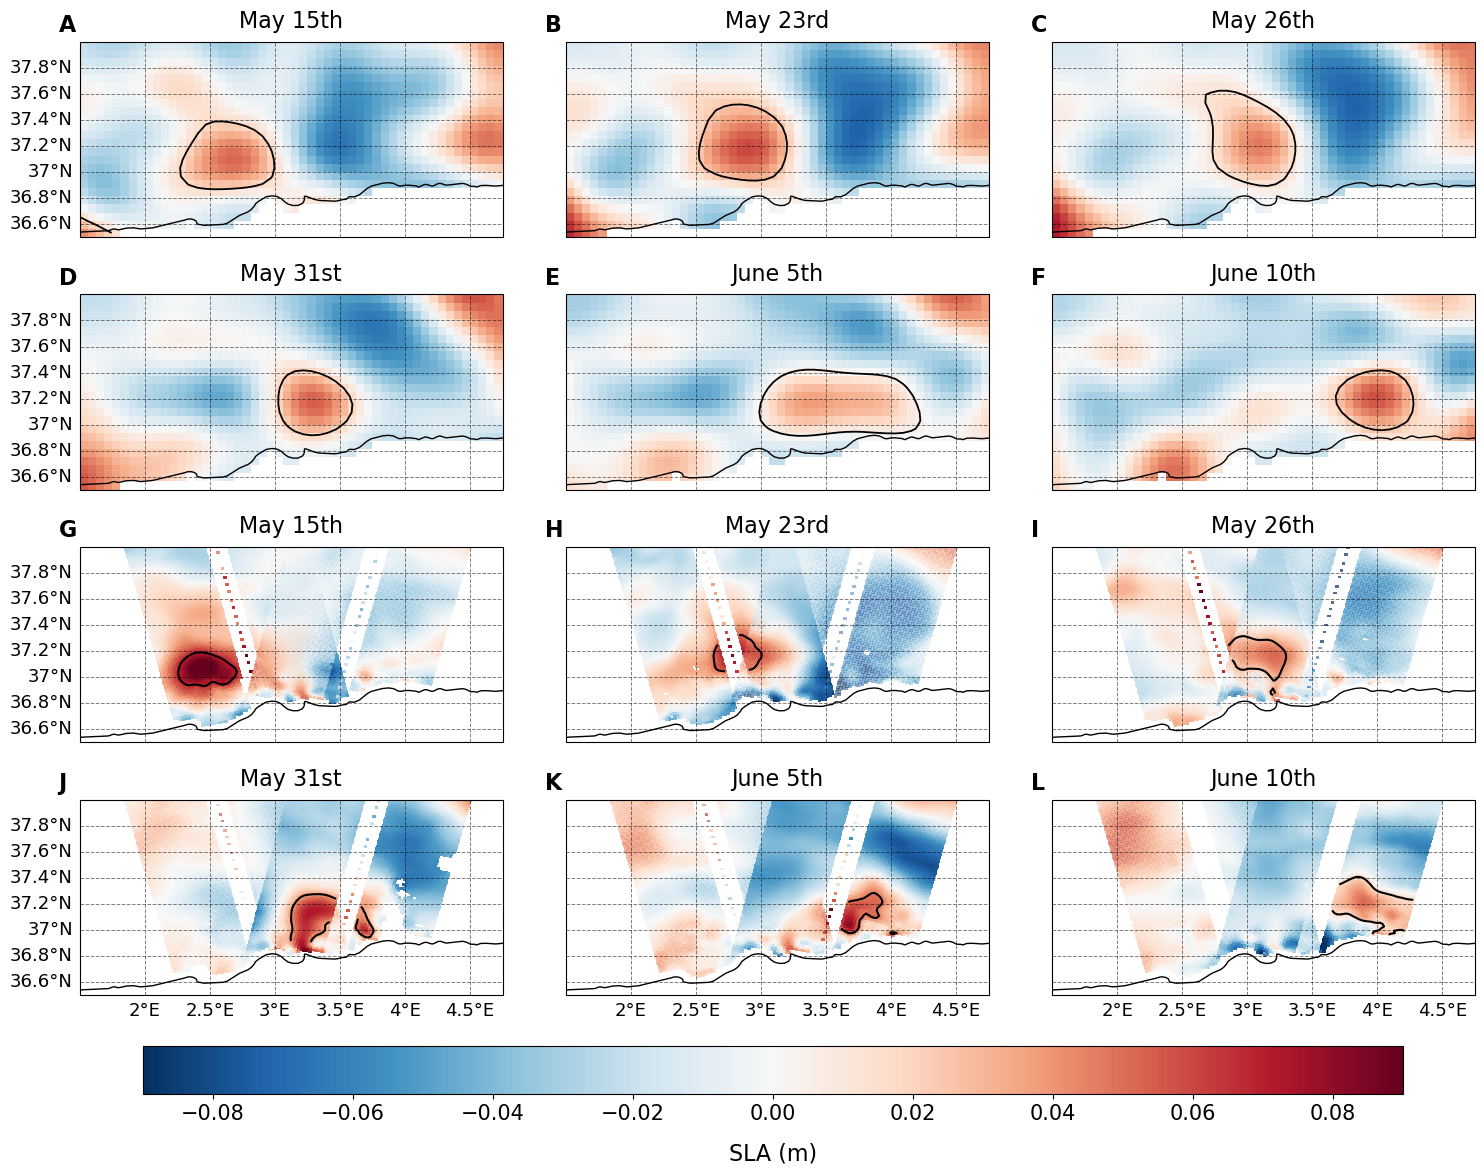

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = ax.flatten()

#########################################
#                 A–F                   #
#########################################

### PLOT A - Conv. Alt. May 15 ###
pcm = ax[0].pcolormesh(sla_conv_alt_anomaly['longitude'], sla_conv_alt_anomaly['latitude'],
                       sla_conv_alt_anomaly[14,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[0].contour(sla_conv_alt_515['longitude'], sla_conv_alt_515['latitude'], sla_conv_alt_515[14,:,:], 
           levels=[contour_lev_515_convalt], colors='k', linewidths=1.3)
ax[0].coastlines(resolution='auto', color='k')
gl=ax[0].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.top_labels=False; gl.right_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[0].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[0].set_title("May 15th", fontsize=16, pad=10)
ax[0].text(-0.05, 1.05, "A", transform=ax[0].transAxes, fontsize=16, fontweight="bold")

### PLOT B - Conv. Alt. May 23 ###
pcm = ax[1].pcolormesh(sla_conv_alt_anomaly['longitude'], sla_conv_alt_anomaly['latitude'],
                       sla_conv_alt_anomaly[22,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[1].contour(sla_conv_alt_523['longitude'], sla_conv_alt_523['latitude'], sla_conv_alt_523[22,:,:], 
           levels=[contour_lev_523_convalt], colors='k', linewidths=1.3)
ax[1].coastlines(resolution='auto', color='k')
gl=ax[1].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.top_labels=False; gl.right_labels=False; gl.left_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[1].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[1].set_title("May 23rd", fontsize=16, pad=10)
ax[1].text(-0.05, 1.05, "B", transform=ax[1].transAxes, fontsize=16, fontweight="bold")

### PLOT C - Conv. Alt. May 26 ###
pcm = ax[2].pcolormesh(sla_conv_alt_anomaly['longitude'], sla_conv_alt_anomaly['latitude'],
                       sla_conv_alt_anomaly[25,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[2].contour(sla_conv_alt_526['longitude'], sla_conv_alt_526['latitude'], sla_conv_alt_526[25,:,:], 
           levels=[contour_lev_526_convalt], colors='k', linewidths=1.3)
ax[2].coastlines(resolution='auto', color='k')
gl=ax[2].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.top_labels=False; gl.right_labels=False; gl.left_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[2].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[2].set_title("May 26th", fontsize=16, pad=10)
ax[2].text(-0.05, 1.05, "C", transform=ax[2].transAxes, fontsize=16, fontweight="bold")

### PLOT D - Conv. Alt. May 31 ###
pcm = ax[3].pcolormesh(sla_conv_alt_anomaly['longitude'], sla_conv_alt_anomaly['latitude'],
                       sla_conv_alt_anomaly[30,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[3].contour(sla_conv_alt_531['longitude'], sla_conv_alt_531['latitude'], sla_conv_alt_531[30,:,:], 
           levels=[contour_lev_531_convalt], colors='k', linewidths=1.3)
ax[3].coastlines(resolution='auto', color='k')
gl=ax[3].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.top_labels=False; gl.right_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[3].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[3].set_title("May 31st", fontsize=16, pad=10)
ax[3].text(-0.05, 1.05, "D", transform=ax[3].transAxes, fontsize=16, fontweight="bold")

### PLOT E - Conv. Alt. June 5 ###
pcm = ax[4].pcolormesh(sla_conv_alt_anomaly['longitude'], sla_conv_alt_anomaly['latitude'],
                       sla_conv_alt_anomaly[35,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[4].contour(sla_conv_alt_605['longitude'], sla_conv_alt_605['latitude'], sla_conv_alt_605[35,:,:], 
              levels=[contour_lev_605_convalt], colors='k', linewidths=1.3)
ax[4].coastlines(resolution='auto', color='k')
gl=ax[4].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.top_labels=False; gl.right_labels=False; gl.left_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[4].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[4].set_title("June 5th", fontsize=16, pad=10)
ax[4].text(-0.05, 1.05, "E", transform=ax[4].transAxes, fontsize=16, fontweight="bold")

### PLOT F - Conv. Alt. June 10 ###
pcm = ax[5].pcolormesh(sla_conv_alt_anomaly['longitude'], sla_conv_alt_anomaly['latitude'],
                       sla_conv_alt_anomaly[40,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[5].contour(sla_conv_alt_610['longitude'], sla_conv_alt_610['latitude'], sla_conv_alt_610[40,:,:], 
           levels=[contour_lev_610_convalt], colors='k', linewidths=1.3)
ax[5].coastlines(resolution='auto', color='k')
gl=ax[5].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.top_labels=False; gl.right_labels=False; gl.left_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[5].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[5].set_title("June 10th", fontsize=16, pad=10)
ax[5].text(-0.05, 1.05, "F", transform=ax[5].transAxes, fontsize=16, fontweight="bold")

#########################################
#                G – L                  #
#########################################

### PLOT G - SWOT May 15 ###
pcml = ax[6].pcolormesh(sla_swot_may_left['0515_l']['longitude'], sla_swot_may_left['0515_l']['latitude'], sla_swot_may_left['0515_l'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
pcmr = ax[6].pcolormesh(sla_swot_may_right['0515_r']['longitude'], sla_swot_may_right['0515_r']['latitude'], sla_swot_may_right['0515_r'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, alpha=0.7)
ax[6].contour(sla_swot_may_left['0515_l']['longitude'], sla_swot_may_left['0515_l']['latitude'], sla_swot_may_left['0515_l'], levels=[contour_level_swot_515], colors='k', 
              linewidths=1.5, transform=ccrs.PlateCarree())
ax[6].coastlines(); gl=ax[6].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.right_labels=False; gl.top_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[6].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[6].set_title("May 15th", fontsize=16, pad=10)
ax[6].text(-0.05, 1.05, "G", transform=ax[6].transAxes, fontsize=16, fontweight="bold")

### PLOT H - SWOT May 23 ###
pcml = ax[7].pcolormesh(sla_swot_may_left['0523_l']['longitude'], sla_swot_may_left['0523_l']['latitude'], sla_swot_may_left['0523_l'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
pcmr = ax[7].pcolormesh(sla_swot_may_right['0523_r']['longitude'], sla_swot_may_right['0523_r']['latitude'], sla_swot_may_right['0523_r'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, alpha=0.5)
ax[7].contour(sla_swot_523_l_cut['longitude'], sla_swot_523_l_cut['latitude'], sla_swot_523_l_cut, levels=[contour_level_swot_523], 
              colors='k', linewidths=1.5, transform=ccrs.PlateCarree())
ax[7].coastlines(); gl=ax[7].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.right_labels=False; gl.top_labels=False; gl.left_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[7].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[7].set_title("May 23rd", fontsize=16, pad=10)
ax[7].text(-0.05, 1.05, "H", transform=ax[7].transAxes, fontsize=16, fontweight="bold")

### PLOT I - SWOT May 26 ###
pcml = ax[8].pcolormesh(sla_swot_may_left['0526_l']['longitude'], sla_swot_may_left['0526_l']['latitude'], sla_swot_may_left['0526_l'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
pcmr = ax[8].pcolormesh(sla_swot_may_right['0526_r']['longitude'], sla_swot_may_right['0526_r']['latitude'], sla_swot_may_right['0526_r'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, alpha=0.7)
ax[8].contour(sla_swot_526_l_cut['longitude'], sla_swot_526_l_cut['latitude'], sla_swot_526_l_cut, levels=[contour_level_swot_526], colors='k', linewidths=1.5, transform=ccrs.PlateCarree())
ax[8].coastlines(); gl=ax[8].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.right_labels=False; gl.top_labels=False; gl.left_labels=False; gl.bottom_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[8].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[8].set_title("May 26th", fontsize=16, pad=10)
ax[8].text(-0.05, 1.05, "I", transform=ax[8].transAxes, fontsize=16, fontweight="bold")

### PLOT J - SWOT May 31 ###
pcml = ax[9].pcolormesh(sla_swot_may_left['0531_l']['longitude'], sla_swot_may_left['0531_l']['latitude'], sla_swot_may_left['0531_l'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, alpha=0.7)
pcmr = ax[9].pcolormesh(sla_swot_may_right['0531_r']['longitude'], sla_swot_may_right['0531_r']['latitude'], sla_swot_may_right['0531_r'], 
                        transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[9].contour(sla_swot_531_r_cut['longitude'], sla_swot_531_r_cut['latitude'], sla_swot_531_r_cut, levels=[contour_level_swot_531], colors='k', linewidths=1.5, transform=ccrs.PlateCarree())
ax[9].coastlines(); gl=ax[9].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.right_labels=False; gl.top_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[9].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[9].set_title("May 31st", fontsize=16, pad=10)
ax[9].text(-0.05, 1.05, "J", transform=ax[9].transAxes, fontsize=16, fontweight="bold")

### PLOT K - SWOT June 5 ###
pcml = ax[10].pcolormesh(sla_swot_june_left['0605_l']['longitude'], sla_swot_june_left['0605_l']['latitude'], sla_swot_june_left['0605_l'], 
                         transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, alpha=0.7)
pcmr = ax[10].pcolormesh(sla_swot_june_right['0605_r']['longitude'], sla_swot_june_right['0605_r']['latitude'], sla_swot_june_right['0605_r'], 
                         transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[10].contour(sla_swot_605_r_cut['longitude'], sla_swot_605_r_cut['latitude'], sla_swot_605_r_cut, levels=[contour_level_swot_605], colors='k', linewidths=1.5, transform=ccrs.PlateCarree())
ax[10].coastlines(); gl=ax[10].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.right_labels=False; gl.top_labels=False; gl.left_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[10].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[10].set_title("June 5th", fontsize=16, pad=10)
ax[10].text(-0.05, 1.05, "K", transform=ax[10].transAxes, fontsize=16, fontweight="bold")

### PLOT L - SWOT June 10 ###
pcml = ax[11].pcolormesh(sla_swot_june_left['0610_l']['longitude'], sla_swot_june_left['0610_l']['latitude'], sla_swot_june_left['0610_l'], 
                         transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, alpha=0.7)
pcmr = ax[11].pcolormesh(sla_swot_june_right['0610_r']['longitude'], sla_swot_june_right['0610_r']['latitude'], sla_swot_june_right['0610_r'], 
                         transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax)
ax[11].contour(sla_swot_610_r_cut['longitude'], sla_swot_610_r_cut['latitude'], sla_swot_610_r_cut, levels=[contour_level_swot_610], colors='k', linewidths=1.5, transform=ccrs.PlateCarree())
ax[11].coastlines(); gl=ax[11].gridlines(draw_labels=True, linewidth=0.7, color='k', alpha=0.5, linestyle='--')
gl.right_labels=False; gl.left_labels=False; gl.top_labels=False
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}
ax[11].set_extent([lon_min, lon_max, lat_min, lat_max])
ax[11].set_title("June 10th", fontsize=16, pad=10)
ax[11].text(-0.05, 1.05, "L", transform=ax[11].transAxes, fontsize=16, fontweight="bold")

#########################################
#            Global colorbar            #
#########################################

# Define the axis for the colorbar
cbar_ax = fig.add_axes([0.16, 0.0001, 0.7, 0.04])  
# Create the colorbar
cbar = plt.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SLA (m)', fontsize=16, labelpad=13)
cbar.ax.tick_params(labelsize=15)


fig.subplots_adjust(bottom=0.08, hspace=0.25, wspace=0.15) 
plt.show()